In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


# load Libraries

In [2]:
import matplotlib.pyplot as plt # for Visualization
import seaborn as sns # for visualization
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Cleaning

In [38]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')
print(train_df.shape)
train_df.head(5)

(74051, 10)


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [39]:
test_df = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')
print(test_df.shape)
test_df.head(5)

(49368, 9)


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [40]:
# test_df

In [41]:
sample_subnission = pd.read_csv('/kaggle/input/playground-series-s3e16/sample_submission.csv')
print(sample_subnission.shape)
sample_subnission.head(5)

(49368, 2)


,id,Age
0,74051,10
1,74052,10
2,74053,10
3,74054,10
4,74055,10


In [42]:
sample_subnission.drop('id', axis=1, inplace=True)

In [43]:
# Merge the two data sets on the 'id' column
Test_df= pd.concat([test_df, sample_subnission], axis=1)
Test_df

Data = pd.concat([train_df, test_df], axis=0)
Data['Age'].fillna(10, inplace=True)
# Test_df.drop('Age', axis=1, inplace=True)
# Test_df

In [44]:
Data.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [11]:
# Test_df.isnull().sum()

In [12]:
# sample_subnission.isnull().sum()

In [13]:
Data['Sex'].value_counts()

M    45007
I    39920
F    38492
Name: Sex, dtype: int64

In [14]:
# test_df['Sex'].value_counts()

In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123419 entries, 0 to 49367
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              123419 non-null  int64  
 1   Sex             123419 non-null  object 
 2   Length          123419 non-null  float64
 3   Diameter        123419 non-null  float64
 4   Height          123419 non-null  float64
 5   Weight          123419 non-null  float64
 6   Shucked Weight  123419 non-null  float64
 7   Viscera Weight  123419 non-null  float64
 8   Shell Weight    123419 non-null  float64
 9   Age             123419 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 10.4+ MB


## Label Encoding
Classify our data into two labels:
- Categorical
- Numerical

In [14]:
# classify the Cat and Numerical
cat_df = Data.select_dtypes(object)
Num_df = Data.select_dtypes(['int64', 'float64'])

In [15]:
# train_df = pd.get_dummies(train_df, columns=['Sex'])
from sklearn.preprocessing import LabelEncoder
for col in cat_df:
    le = LabelEncoder()
    cat_df[col] = le.fit_transform(cat_df[col])

In [15]:
cat_df.head()

,Sex
0,1
1,1
2,2
3,0
4,1


In [15]:
Data = pd.concat([cat_df, Num_df], axis=1)
Data

,Sex,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0
1,I,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0
2,M,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0
3,F,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0
4,I,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0
...,...,...,...,...,...,...,...,...,...,...
49363,F,123414,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309,10.0
49364,I,123415,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687,10.0
49365,F,123416,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345,10.0
49366,F,123417,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163,10.0


## Get Dummies

In [45]:
Data = pd.get_dummies(Data)
Data.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0,0,1,0
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0,0,1,0
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0,0,0,1
3,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0,1,0,0
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0,0,1,0


In [17]:
# Test_df = pd.get_dummies(Test_df, columns=['Sex'])

In [18]:
# Test_df.head()

In [19]:
# train_df.head()

In [20]:
# train_df.info()

In [21]:
# train_df.describe()

In [22]:
# Test_df.head()

In [19]:
Data.duplicated().sum()

0

In [24]:
# test_df.duplicated().sum()

## Standard Scaler

In [46]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler_data = pd.DataFrame(scaler.fit_transform(Data),columns=Data.columns)
Data = scaler_data

In [47]:
Data.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,-1.732037,0.718793,0.631696,0.289493,0.439381,0.465547,0.567242,0.451358,-0.398730,-0.673228,1.446257,-0.757615
1,-1.732009,-0.759805,-0.844629,-0.796001,-1.027916,-0.995977,-0.981080,-0.930145,-0.805314,-0.673228,1.446257,-0.757615
2,-1.731981,0.240423,0.368067,0.289493,0.107586,0.218173,0.176354,-0.019699,-0.398730,-0.673228,-0.691440,1.319931
3,-1.731953,1.327628,1.633489,1.646360,2.154403,1.823577,2.122934,2.307877,0.414437,1.485380,-0.691440,-0.757615
4,-1.731925,-0.237947,-0.053740,-0.117567,-0.010112,0.331763,-0.199304,-0.217622,-0.805314,-0.673228,1.446257,-0.757615


## checking outliers

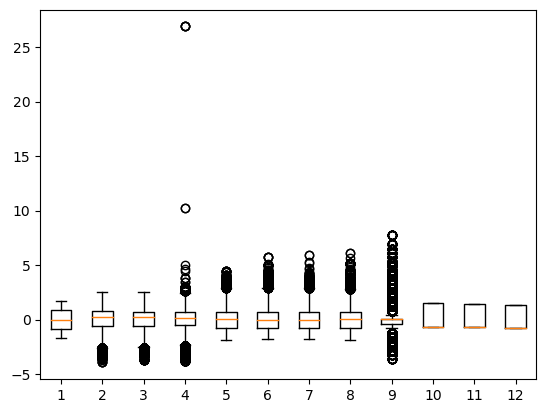

<Figure size 1500x500 with 0 Axes>

In [48]:
plt.boxplot(Data)
fig = plt.figure(figsize =(15, 5))
plt.show()


### preprocess the outliers using IQR

In [25]:
# finding the 1st quartile
q1 = np.quantile(Data, 0.25)

# finding the 3rd quartile
q3 = np.quantile(Data, 0.75)
med = np.median(Data)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


1.4755496924092786 2.997434025395278 -2.9047647442418363


In [26]:
outliers = Data[(Data <= lower_bound) | (Data >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))


The following are the outliers in the boxplot:[ 3.26052313  3.16141396  3.26052313 ... -3.10816694 -3.00639165
 -3.23863149]


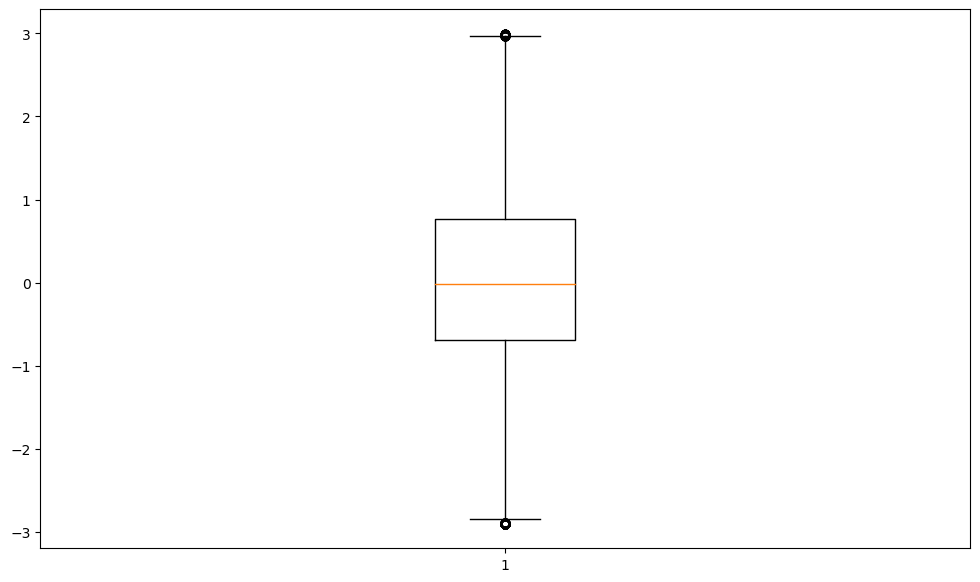

In [30]:
# boxplot of data within the whisker
arr2 = Data[(Data >= lower_bound) & (Data <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(arr2)
plt.show()


In [21]:
from scipy import stats

In [24]:
# Data.head()
%matplotlib inline

In [31]:
Data = pd.DataFrame(Data)

In [33]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.732037,0.718793,0.631696,0.289493,0.439381,0.465547,0.567242,0.451358,-0.398730,-0.673228,1.446257,-0.757615
1,-1.732009,-0.759805,-0.844629,-0.796001,-1.027916,-0.995977,-0.981080,-0.930145,-0.805314,-0.673228,1.446257,-0.757615
2,-1.731981,0.240423,0.368067,0.289493,0.107586,0.218173,0.176354,-0.019699,-0.398730,-0.673228,-0.691440,1.319931
3,-1.731953,1.327628,1.633489,1.646360,2.154403,1.823577,2.122934,2.307877,0.414437,1.485380,-0.691440,-0.757615
4,-1.731925,-0.237947,-0.053740,-0.117567,-0.010112,0.331763,-0.199304,-0.217622,-0.805314,-0.673228,1.446257,-0.757615


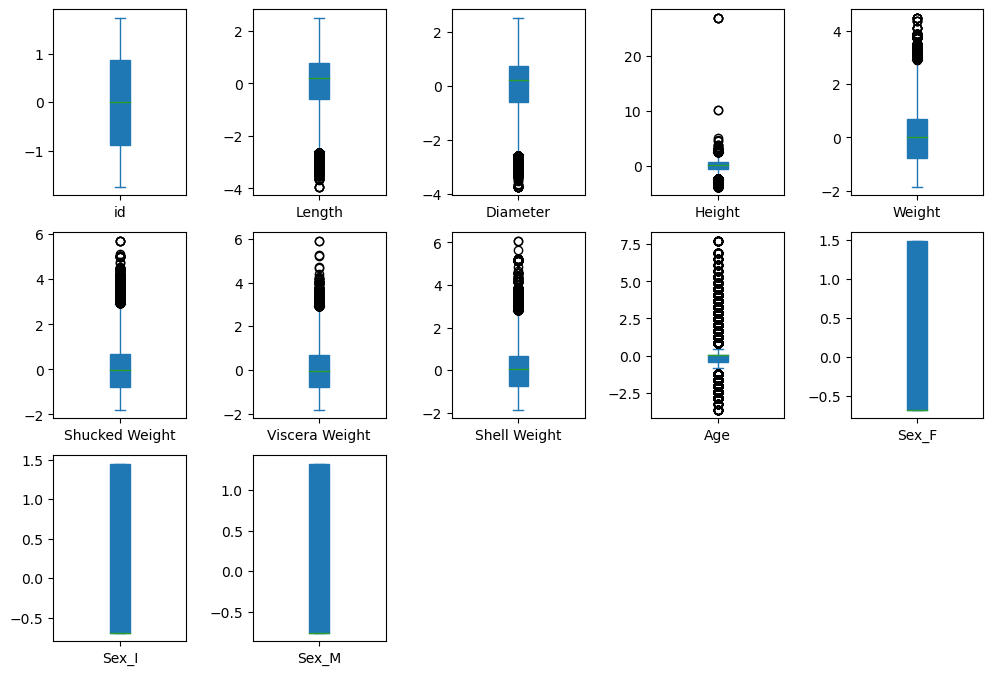

In [49]:
Data.plot(subplots=True, layout=(5,5),kind='box',figsize=(12,14),patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [50]:
n_data = Data[(np.abs(stats.zscore(Data)) < 3).all(axis=1)]

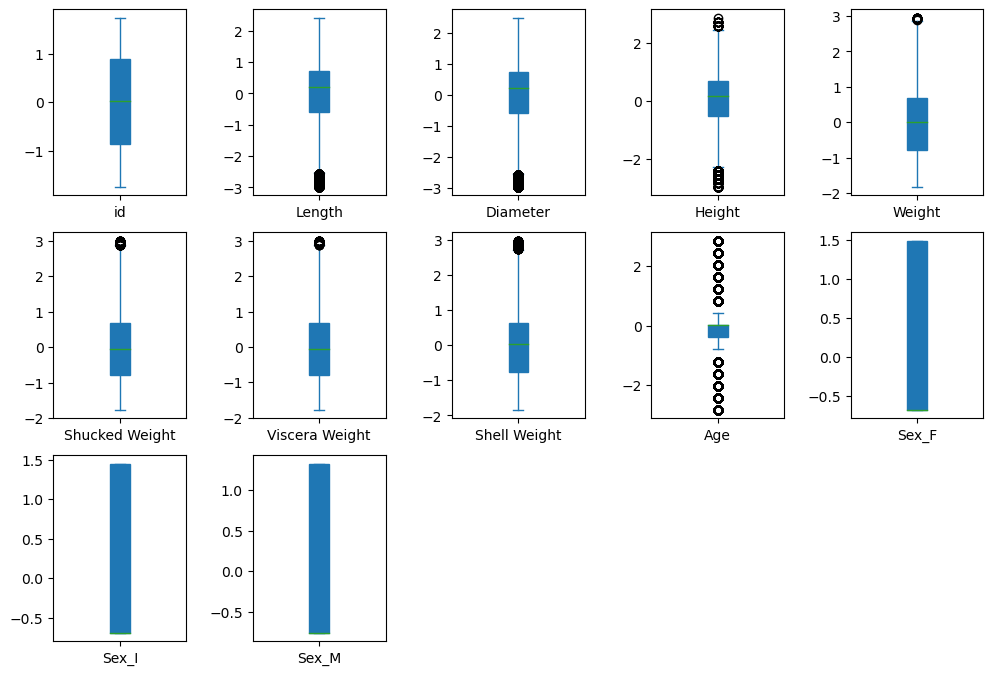

In [52]:
n_data.plot(subplots=True, layout=(5,5),kind='box',figsize=(12,14),patch_artist=True)
plt.subplots_adjust(wspace=0.5);

## Finding Correlation 

In [34]:
corr = train_df.corr()
corr['Age'].sort_values(ascending=True)

Sex_I            -0.515909
id                0.000089
Sex_M             0.221978
Sex_F             0.290494
Shucked Weight    0.503320
Viscera Weight    0.576808
Weight            0.601195
Length            0.612843
Diameter          0.621256
Height            0.638067
Shell Weight      0.663473
Age               1.000000
Name: Age, dtype: float64

<Axes: >

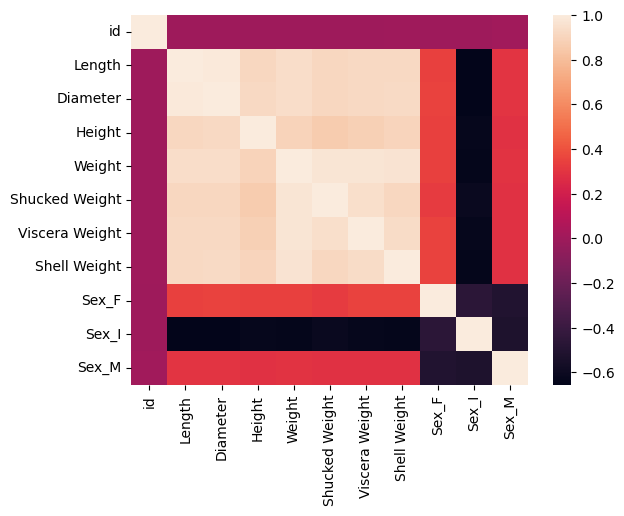

In [40]:
corr2 = Test_df.corr()
corr2.sort_values(ascending=True)

# Data preprocessing for 

# Data visualization

In [ ]:
plt.hist(Data['Length'], bins=10)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Histogram of Length')
plt.show()

In [ ]:
plt.scatter(Data['Length'], Data['Weight'])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('Scatter Plot of Length vs Weight')
plt.show()

# Baseline Model

## Split the data

In [55]:
X = Data.drop(['id', 'Age'], axis=1)
y = Data['Age']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((98735, 8), (24684, 8), (98735,), (24684,))

## 1. Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the mean squared error
mse = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mse)

Mean Squared Error: 0.6876698151815958
Mean Absolute Error: 0.5937763195312908


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Create an instance of the Linear Regression model
model = LinearRegression()

# Define the parameter grid for GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [1, -1]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model, param_grid)

# Fit the GridSearchCV instance to your data
grid_search.fit(X_train, y_train)

# Access the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_score

## 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the mean squared error
mse = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mse)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create an instance of the Decision Tree model
model = DecisionTreeRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model, param_grid)

# Fit the GridSearchCV instance to your data
grid_search.fit(X_train, y_train)

# Access the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_score

## 3. SVR


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Create an instance of the Support Vector Regression model
model = SVR()

# Define the parameter grid for GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model, param_grid)

# Fit the GridSearchCV instance to your data
grid_search.fit(X_train, y_train)

# Access the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_score

## 4. Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the mean squared error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate the mean squared error
acc = model.score(X_train, y_train)
print("accuarcy score:", acc)

Mean Squared Error: 0.7169544989740858
Mean Absolute Error: 0.6082433536954962
accuarcy score: 0.9022634420181985


# Test Model

In [ ]:
test_df.replace({'Sex':{'M':2,'I':1,'F':0}},inplace=True)

In [ ]:
test_df['Age']=model.predict(test_df.drop(['id'],axis=1))

In [ ]:
test_df[['id','Age']].to_csv('submission.csv',index=False)